# MODELO  NO SUPERVISADO 

In [244]:
# Se importan las librerías que se utilizarán: 
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import re
import array
import warnings
warnings.filterwarnings('ignore')
from matplotlib.cm import viridis
from sklearn.preprocessing import StandardScaler

In [163]:
# Se carga el data set
suram1=pd.read_csv(r'..\\datasets\\suram1.csv')  

In [164]:
# Se verifica el tipo de dato de cada columna
suram1. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Columns: 123 entries, iso_code to Coordenadas
dtypes: float64(119), int64(1), object(3)
memory usage: 1.2+ MB


In [165]:
# Se verifica que no hayan valores nulos
suram1.isna().sum()

iso_code                   0
country                    0
year                       0
coal_prod_change_pct      40
coal_prod_change_twh       1
                          ..
wind_cons_change_twh      66
wind_consumption          65
wind_elec_per_capita      85
wind_energy_per_capita     0
Coordenadas                0
Length: 123, dtype: int64

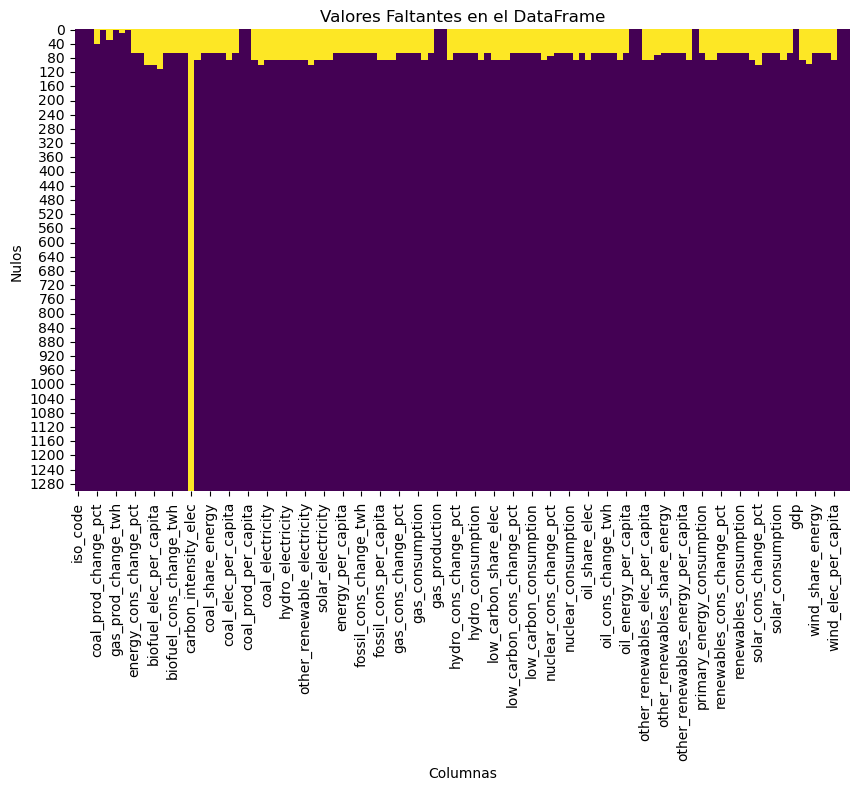

In [166]:
# Se visualiza los valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(suram1.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.xlabel('Columnas')
plt.ylabel('Nulos')
plt.show()

Debido a que los países latinos selecionados no poseen información sobre la producción de electricidad proveniente del carbón se eliminará la columna.

In [167]:
# Se elimina la columna 
suram1 = suram1.drop('coal_share_elec', axis=1)

In [168]:
# Se realizan códigos para la columna country que posee variables cualitativas
map_gender = {'Argentina': 1, 'Bolivia':2, 'Brazil':3, 'Chile':4, 'Colombia':5, 'Ecuador':6,'French Guiana':7, 'Guyana':8, 'Paraguay':9, 'Peru':10, 'Suriname':11,'Trinidad and Tobago':12, 'Uruguay':13, 'Venezuela':14}
suram1['country'] =suram1['country'].replace(map_gender)

In [169]:
# Se visualiza el set de datos
suram1

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita,Coordenadas
0,ARG,1,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.311303e+10,NaN,NaN,NaN,NaN,NaN,NaN,0.000,"(-34.9964963, -64.9672817)"
1,ARG,1,1901,NaN,0.000,NaN,0.000,NaN,0.000,NaN,...,NaN,2.404338e+10,NaN,NaN,NaN,NaN,NaN,NaN,0.000,"(-34.9964963, -64.9672817)"
2,ARG,1,1902,NaN,0.000,NaN,0.000,NaN,0.000,NaN,...,NaN,2.354418e+10,NaN,NaN,NaN,NaN,NaN,NaN,0.000,"(-34.9964963, -64.9672817)"
3,ARG,1,1903,NaN,0.000,NaN,0.000,NaN,0.000,NaN,...,NaN,2.693200e+10,NaN,NaN,NaN,NaN,NaN,NaN,0.000,"(-34.9964963, -64.9672817)"
4,ARG,1,1904,NaN,0.000,NaN,0.000,NaN,0.000,NaN,...,NaN,2.981703e+10,NaN,NaN,NaN,NaN,NaN,NaN,0.000,"(-34.9964963, -64.9672817)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,VEN,14,2015,0.132,0.009,13.454,42.768,-2.271,-36.531,-3.519,...,0.739,4.830000e+11,0.060,9.162,0.000,0.003,0.003,2.360,0.106,"(8.0018709, -66.1109318)"
1298,VEN,14,2016,-49.242,-3.352,3.254,11.737,-10.587,-166.400,-9.263,...,0.845,3.960000e+11,0.068,-100.000,0.000,-0.003,0.000,2.378,0.000,"(8.0018709, -66.1109318)"
1299,VEN,14,2017,-2.473,-0.085,3.670,13.667,-11.112,-156.159,-4.490,...,0.851,3.960000e+11,0.071,-100.000,0.000,0.000,0.000,2.415,0.000,"(8.0018709, -66.1109318)"
1300,VEN,14,2018,-48.979,-1.650,-18.097,-69.863,-29.703,-371.043,-14.049,...,0.765,3.960000e+11,0.073,-100.000,0.000,0.000,0.000,2.458,0.000,"(8.0018709, -66.1109318)"


In [170]:
# Se imputan los valores nulos con el valor mediano 
suram1 = suram1.fillna(suram1.median())

In [171]:
# Se elimina la columna iso_code
suram1 = suram1.drop('iso_code', axis=1)
print(suram1)

      country  year  coal_prod_change_pct  coal_prod_change_twh  \
0           1  1900                 0.000                 0.000   
1           1  1901                 0.000                 0.000   
2           1  1902                 0.000                 0.000   
3           1  1903                 0.000                 0.000   
4           1  1904                 0.000                 0.000   
...       ...   ...                   ...                   ...   
1297       14  2015                 0.132                 0.009   
1298       14  2016               -49.242                -3.352   
1299       14  2017                -2.473                -0.085   
1300       14  2018               -48.979                -1.650   
1301       14  2019                49.102                 0.844   

      gas_prod_change_pct  gas_prod_change_twh  oil_prod_change_pct  \
0                   1.766                0.000                0.275   
1                   1.766                0.000       

In [172]:
# Se observan los datos numericos, para proceder a normalizarloss
suram1.describe()

,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,...,1302.000000,1302.000000,1.302000e+03,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,6.834101,1966.113671,4.552691,-0.721076,-8.063727,1.607165,7.871481,1.864455,3.934655,10.915449,...,49.691737,64.789551,1.755939e+11,4.823502,77.205442,0.700455,2.574894,10.401929,168.706818,126.769238
std,4.196753,35.220347,82.053352,7.358980,160.655915,7.865861,65.568265,30.543954,8.759180,25.807204,...,99.700245,179.806591,3.476554e+11,10.059473,606.565480,1.089138,4.905910,30.619917,390.880918,210.948823
min,1.000000,1900.000000,-100.000000,-50.052000,-100.000000,-69.863000,-57.013000,-389.581000,-43.123000,-111.424000,...,0.000000,0.000000,1.264200e+09,0.000000,-100.000000,0.000000,-0.147000,0.000000,0.000000,0.000000
25%,3.000000,1936.000000,-2.235000,0.000000,-9.173750,0.000000,-4.028750,0.000000,-0.265750,-0.095250,...,0.002000,0.000000,1.294574e+10,0.000000,6.999000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,1971.000000,0.000000,0.000000,1.766000,0.000000,0.275000,0.000000,2.859500,5.332000,...,17.212000,23.724000,5.273810e+10,0.271000,9.162000,0.102000,0.012000,0.212000,4.950000,12.190000
75%,11.000000,1997.000000,0.000000,0.662000,5.563000,0.969500,5.525750,2.290750,6.229250,16.546000,...,29.743000,44.220000,1.862500e+11,6.970000,47.180000,1.286000,4.207000,12.371000,208.421000,276.258000
max,14.000000,2020.000000,2700.001000,91.498000,4875.014000,79.230000,1855.342000,263.379000,127.155000,278.543000,...,390.561000,823.171000,3.180000e+12,40.314000,21229.922000,4.013000,29.510000,138.255000,1564.595000,692.509000


In [173]:
#Se escalan los datos
# Se escalan los datos:
p1_scal = (suram1-suram1.min())/(suram1.max()-suram1.min())
p1_scal

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [208]:
# Se seleccionan las variables a analizar

x=p1_scal[['wind_share_elec','wind_cons_change_pct','wind_share_energy','wind_consumption', 'coal_prod_change_pct',	'coal_prod_change_twh',	'gas_prod_change_pct',	'gas_prod_change_twh',	'oil_prod_change_pct',	'oil_prod_change_twh',	'energy_cons_change_twh','solar_elec_per_capita' ,'solar_energy_per_capita']].values
pd.DataFrame(x).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.006722,0.005118,0.025417,0.001533,0.035714,0.353599,0.020455,0.468587,0.029957,0.596638,0.2994,0.04407,0.02882
1,0.006722,0.005118,0.025417,0.001533,0.035714,0.353599,0.020455,0.468587,0.029957,0.596638,0.2994,0.04407,0.02882
2,0.006722,0.005118,0.025417,0.001533,0.035714,0.353599,0.020455,0.468587,0.029957,0.596638,0.2994,0.04407,0.02882
3,0.006722,0.005118,0.025417,0.001533,0.035714,0.353599,0.020455,0.468587,0.029957,0.596638,0.2994,0.04407,0.02882
4,0.006722,0.005118,0.025417,0.001533,0.035714,0.353599,0.020455,0.468587,0.029957,0.596638,0.2994,0.04407,0.02882


In [241]:
# Se seleccionan las variables a analizar
pd.DataFrame(x).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.006722,0.005118,0.025417,0.001533,0.035714,0.353599,0.020455,0.468587,0.029957,0.596638,0.2994,0.04407,0.02882
1,0.006722,0.005118,0.025417,0.001533,0.035714,0.353599,0.020455,0.468587,0.029957,0.596638,0.2994,0.04407,0.02882
2,0.006722,0.005118,0.025417,0.001533,0.035714,0.353599,0.020455,0.468587,0.029957,0.596638,0.2994,0.04407,0.02882
3,0.006722,0.005118,0.025417,0.001533,0.035714,0.353599,0.020455,0.468587,0.029957,0.596638,0.2994,0.04407,0.02882
4,0.006722,0.005118,0.025417,0.001533,0.035714,0.353599,0.020455,0.468587,0.029957,0.596638,0.2994,0.04407,0.02882


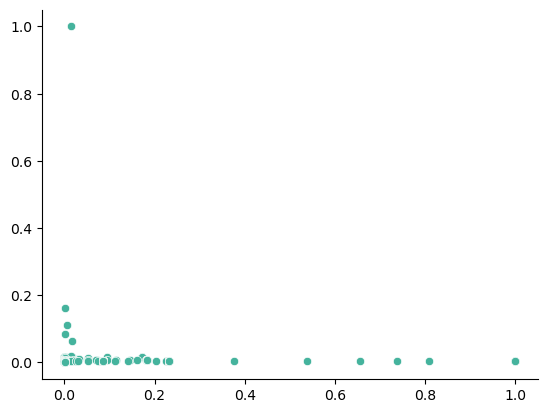

In [211]:
sns.scatterplot(x = x[:,0], y = x[:,1], color='#45B39D')
sns.despine()
plt.show()

## Método del codo:
Se realiza el método del codo para conocer los posibles clusters en que se clasificará el modelo. Dependiendo delos valores que arroje se realizarán las pruebas pertinentes.



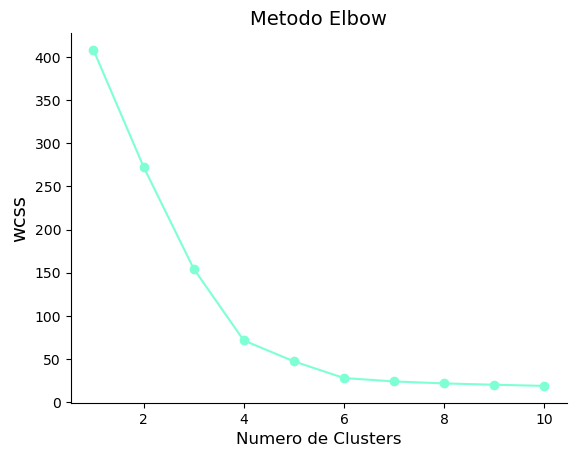

In [216]:
#Se realiza el método del codo para determinar la cantidad de clusters
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss, marker='o',c="#7FFFD4")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Elbow', size=14)
plt.xlabel('Numero de Clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

Se observa que el grafico arroja un numero de clusters que esta entre 2, 3 y 4, que son punto en donde se aprecia que comienza a disminuir bruscamente (punto de quiebre) la variación. A contnuación se verificarán los tres tipos de números de clusters para determinar cual tiene mejor desempeño.

## Cantidad de clusters: 4

In [217]:
# Se instancia el modelo con el numero de clusters=4
kmeansmodel4 = KMeans(n_clusters=4, random_state=0)
kmeansmodel4.fit(x)
KMeans(n_clusters=4, random_state=0)

KMeans(n_clusters=4, random_state=0)

In [218]:
# Se realizan las etiquetas de los clusters
etiquetas_4 = kmeansmodel4.labels_
np.unique(etiquetas_4)

array([0, 1, 2, 3])

In [221]:
# Se realiza la predicción:
y_means4=kmeansmodel4.fit_predict(x)

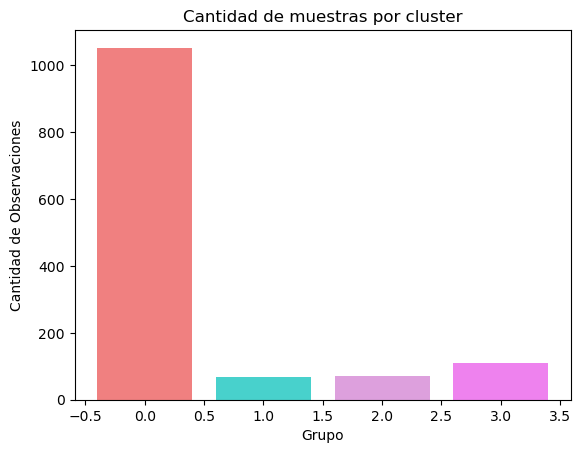

In [225]:
#Se verifica la cantidad de observaciones (4 clusters)
cluster_counts = np.bincount(y_means4)
cluster_labels = list(range(len(cluster_counts)))
colors = ['lightcoral', 'mediumturquoise', 'plum', 'violet']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()

Se observa que la distribución de las muestras en 4 clusters no es igual en cada grupo. Se analizará posteriormente la distribución en las otras posibilidades de cantidad de clusters.

In [199]:
# Se observan las coordenandas de los centroides
centroids4 =kmeansmodel4.cluster_centers_
print(centroids4)

[[3.31182506e-02 8.89409000e-03 1.03815733e-01 6.28173571e-02
  2.11035439e-02 3.65588016e-02 3.46991794e-01 1.69791412e-02
  4.80733241e-01 3.35412841e-02 6.00771701e-01 2.78882591e-01
  3.07006198e-01 3.93760204e-02 2.65248325e-02]
 [1.80294471e-01 6.86688814e-03 7.04771088e-01 1.44044493e-01
  9.40594438e-02 3.67517415e-02 3.56439011e-01 2.06295246e-02
  4.68308031e-01 4.04410845e-02 5.98937503e-01 2.52080868e-01
  2.83318808e-01 9.86404878e-01 9.92257917e-01]
 [8.39931086e-01 5.44185598e-03 5.55111512e-17 6.24626410e-03
  0.00000000e+00 4.52667501e-02 3.53151344e-01 2.07561335e-02
  4.77138065e-01 2.75179651e-02 5.82719504e-01 2.74228935e-01
  2.98722946e-01 4.54178919e-01 6.40869825e-03]
 [2.29654711e-01 5.41290172e-03 9.90174789e-01 6.10337237e-01
  9.89239862e-01 3.72193336e-02 3.56151284e-01 3.53541834e-02
  4.73206081e-01 4.34186121e-02 6.07177994e-01 2.65653394e-01
  4.68200826e-01 8.81584987e-02 7.67925498e-02]]


## Cantidad de clusters: 3

In [200]:
# Se instancia el modelo con el numero de clusters=3
kmeansmodel3 = KMeans(n_clusters=3, random_state=0)
kmeansmodel3.fit(x)
KMeans(n_clusters=3, random_state=0)

KMeans(n_clusters=3, random_state=0)

In [201]:
# Se realizan las etiquetas de los clusters
etiquetas_3 = kmeansmodel3.labels_
np.unique(etiquetas_3)

array([0, 1, 2])

In [202]:
# Se realiza la predicción:
y_means3=kmeansmodel3.fit_predict(x)

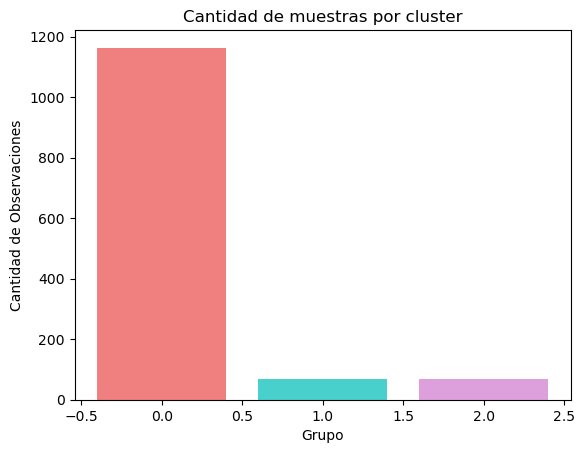

In [223]:
#Se verifica la cantidad de observaciones (3 clusters)
cluster_counts = np.bincount(y_means3)
cluster_labels = list(range(len(cluster_counts)))
colors = ['lightcoral', 'mediumturquoise', 'plum']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()

Se observa que la distribución de las muestras en 3 clusters no es igual en cada grupo. Se analizará posteriormente la distribución en las otras posibilidades de cantidad de clusters.

In [204]:
# Se observan las coordenandas de los centroides
centroids3 =kmeansmodel3.cluster_centers_
print(centroids3)

[[0.10942901 0.00856757 0.09399653 0.05746669 0.01910751 0.03738243
  0.34757438 0.01733638 0.4803932  0.03297158 0.59906427 0.27844243
  0.30622274 0.07860931 0.02462219]
 [0.18029447 0.00686689 0.70477109 0.14404449 0.09405944 0.03675174
  0.35643901 0.02062952 0.46830803 0.04044108 0.5989375  0.25208087
  0.28331881 0.98640488 0.99225792]
 [0.22965471 0.0054129  0.99017479 0.61033724 0.98923986 0.03721933
  0.35615128 0.03535418 0.47320608 0.04341861 0.60717799 0.26565339
  0.46820083 0.0881585  0.07679255]]


## Cantidad de clusters: 2

In [226]:
# Se instancia el modelo con el numero de clusters=2
kmeansmodel2 = KMeans(n_clusters=2, random_state=0)
kmeansmodel2.fit(x)
KMeans(n_clusters=2, random_state=0)

KMeans(n_clusters=2, random_state=0)

In [227]:
# Se realizan las etiquetas de los clusters
etiquetas_2 = kmeansmodel2.labels_
np.unique(etiquetas_2)

array([0, 1])

In [228]:
# Se realiza la predicción:
y_means2=kmeansmodel2.fit_predict(x)

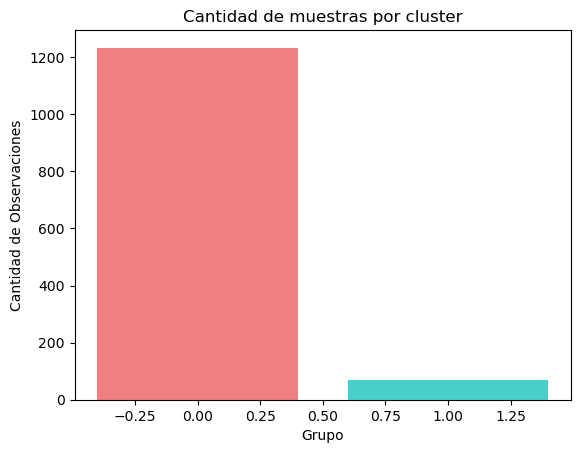

In [229]:
#Se verifica la cantidad de observaciones (3 clusters)
cluster_counts = np.bincount(y_means2)
cluster_labels = list(range(len(cluster_counts)))
colors = ['lightcoral', 'mediumturquoise', 'plum']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()

Se observa que la distribución de las muestras en 2 clusters no es igual en cada grupo. Se analizará posteriormente la distribución en las otras posibilidades de cantidad de clusters.

In [230]:
# Se observan las coordenandas de los centroides
centroids2 =kmeansmodel2.cluster_centers_
print(centroids2)

[[0.11625447 0.00838847 0.14487445 0.07418396 0.03737317 0.34806131
  0.01835929 0.47998517 0.03356468 0.5995249  0.31541858 0.07915144
  0.02758401]
 [0.18029447 0.00686689 0.70477109 0.09405944 0.03675174 0.35643901
  0.02062952 0.46830803 0.04044108 0.5989375  0.28331881 0.98640488
  0.99225792]]


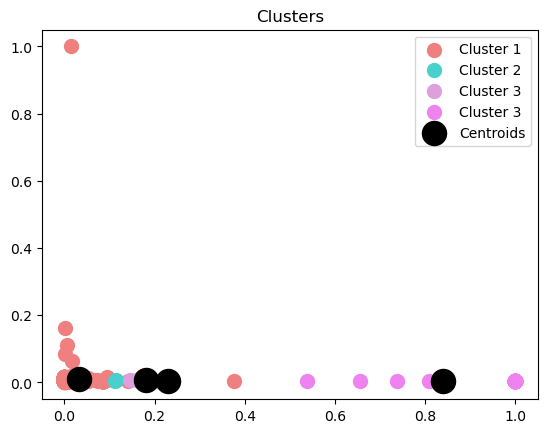

In [235]:
# 
plt.scatter(x[y_means4 == 0, 0], x[y_means4 == 0, 1], s = 100, c = 'lightcoral', label = 'Cluster 1')
plt.scatter(x[y_means4 == 1, 0], x[y_means4 == 1, 1], s = 100, c = 'mediumturquoise', label = 'Cluster 2')
plt.scatter(x[y_means4 == 2, 0], x[y_means4 == 2, 1], s = 100, c = 'plum', label = 'Cluster 3')
plt.scatter(x[y_means4 == 3, 0], x[y_means4 == 3, 1], s = 100, c = 'violet', label = 'Cluster 3')
plt.scatter(kmeansmodel4.cluster_centers_[:, 0], kmeansmodel4.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

# DBSCAN

In [246]:
from sklearn.cluster import DBSCAN

dbscan_1 = DBSCAN(eps=0.3, min_samples=10)

In [248]:
dbscan_1.fit(x)

DBSCAN(eps=0.3, min_samples=10)

### ver los codigos que siguen

In [251]:
def plot_DBSCAN(X,labels_1,db_1,n_clusters_1):
    core_samples_mask_1 = np.zeros_like(db_1.labels_, dtype=bool)
    core_samples_mask_1[db_1.core_sample_indices_] = True
    unique_labels = set(labels_1)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]

        class_member_mask = (labels_1 == k)

        xy = X1[class_member_mask & core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X1[class_member_mask & ~core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    plt.title('Numero estimado de clusters: %d' % n_clusters_1)
    plt.show()

In [252]:
print('Numero estimado de clusters: %d' % n_clusters_1)
print('Numero estimado de puntos outliers: %d' % n_noise_1)

NameError: name 'n_clusters_1' is not defined

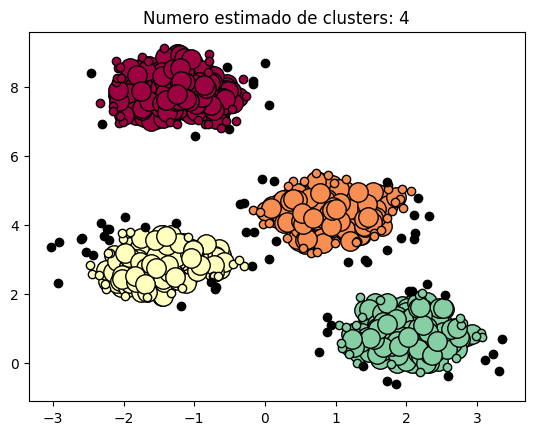

In [ ]:
plot_DBSCAN(X1, labels_1, dbscan_1, n_clusters_1)